# Impacto do tempo de duração das músicas no sucesso da faixa e média de duração das músicas de cada artista

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from datetime import datetime

In [36]:
import helpers
df = helpers.load_aggregated_data_set('./Artista_data').drop(columns=['Unnamed: 0'])
df


,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,artist,album_size
0,Taxman - 2022 Mix,Revolver (Super Deluxe),2022-10-28,1,1u2yF3CsOvVOMP82AgP2gJ,spotify:track:1u2yF3CsOvVOMP82AgP2gJ,0.00225,0.484,0.771,0.000000,0.7180,-6.151,0.1300,133.603,0.679,57,158266,The Beatles,50
1,Eleanor Rigby - 2022 Mix,Revolver (Super Deluxe),2022-10-28,2,1Oo6F5Dn1s8hrUDUQuoCqB,spotify:track:1Oo6F5Dn1s8hrUDUQuoCqB,0.85300,0.606,0.304,0.000000,0.3400,-7.485,0.0414,137.891,0.808,62,126466,The Beatles,50
2,I'm Only Sleeping - 2022 Mix,Revolver (Super Deluxe),2022-10-28,3,7sNSyrCw3F7qnMpl938JUZ,spotify:track:7sNSyrCw3F7qnMpl938JUZ,0.09440,0.559,0.479,0.000000,0.2690,-7.890,0.0281,103.392,0.658,57,180320,The Beatles,50
3,Love You To - 2022 Mix,Revolver (Super Deluxe),2022-10-28,4,0NT88kD8fIXuwBOuXlPcmx,spotify:track:0NT88kD8fIXuwBOuXlPcmx,0.70600,0.460,0.600,0.000043,0.0630,-9.108,0.0472,124.210,0.679,54,179866,The Beatles,50
4,"Here, There And Everywhere - 2022 Mix",Revolver (Super Deluxe),2022-10-28,5,47gNXRKcBJxu6bOvmyUroI,spotify:track:47gNXRKcBJxu6bOvmyUroI,0.87000,0.345,0.304,0.000031,0.1160,-9.477,0.0297,164.568,0.425,55,144906,The Beatles,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Our Song,Taylor Swift,2006-10-24,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,76,201106,Taylor Swift,15
5615,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,62,213053,Taylor Swift,15
5616,Invisible,Taylor Swift,2006-10-24,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,58,203226,Taylor Swift,15
5617,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,57,220146,Taylor Swift,15


In [161]:
def plot_artist(c_artist):
    df_slice = df[df['artist'] == c_artist]
    b = df_slice[df_slice['duration_ms'] < 60000]
    t = df_slice[df_slice['duration_ms'] > 9 * 60000]
    m = df_slice[(df_slice['duration_ms'] >= 60000) & (df_slice['duration_ms'] <= 9 * 60000)]
    mg = m['popularity'].groupby((m['duration_ms']/20000).astype(int), observed=True)

    bp = b['popularity'].median()
    tp = t['popularity'].median()
    mp = mg.median()

    x=np.concatenate([[2/3], mp.index/3, [9]])
    y=np.concatenate([[bp], mp, [tp]])
    c=np.concatenate([[b['popularity'].count()], mg.count(), [t['popularity'].count()]])

    fig, ax1 = plt.subplots()
    ax1.set_title('Popularidade das músicas por duração - %s' % c_artist)
    ax1.set_xlabel('Duração (minutos)')
    ax1.set_ylabel('Quantidade de músicas')
    ax1.bar(x, c, alpha=0.25, width=1/3, color="orange")
    ax2=ax1.twinx()
    ax2.set_ylabel('Mediana da popularidade (%)')
    ax2.scatter(x,y)

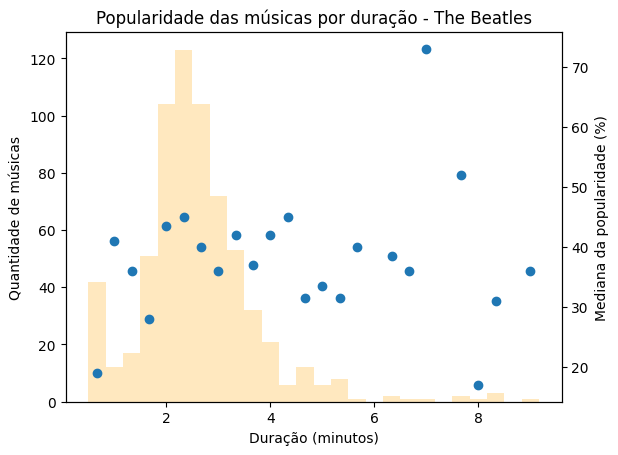

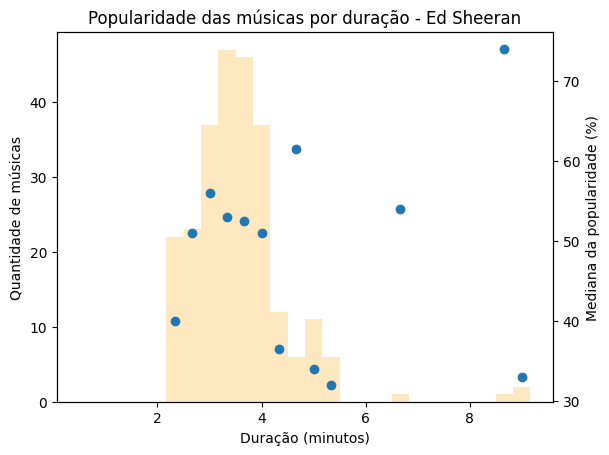

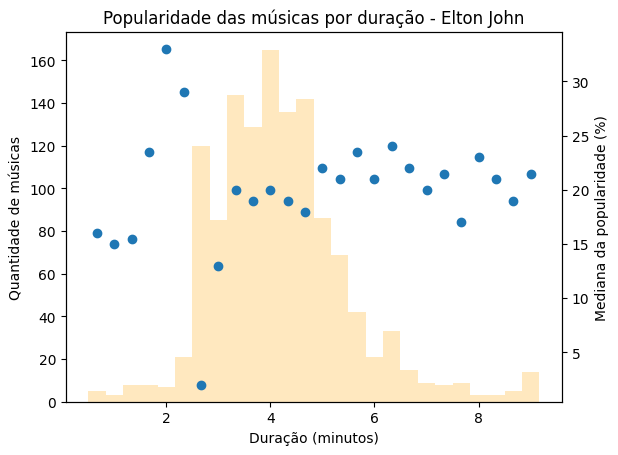

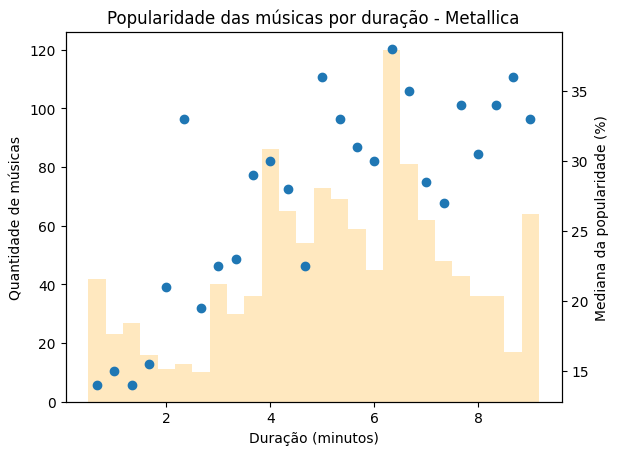

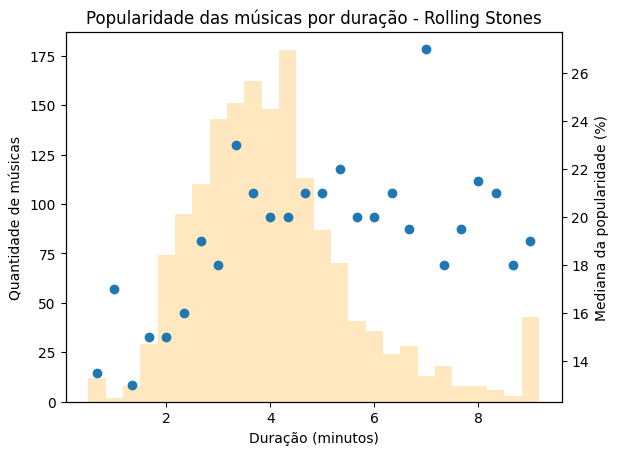

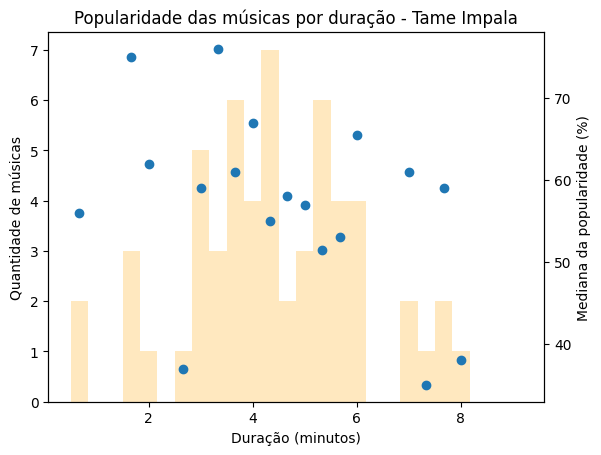

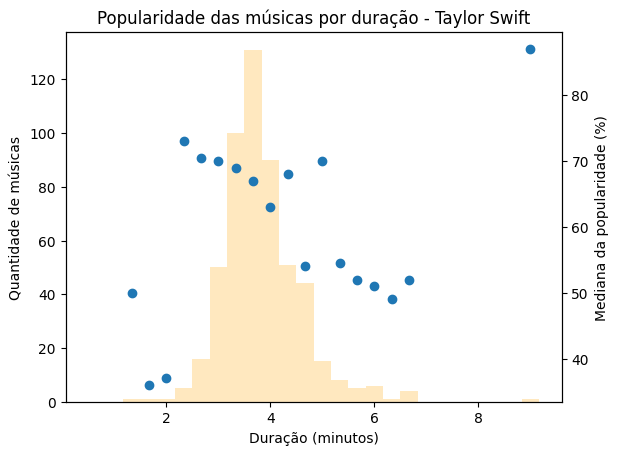

In [164]:
artists = df['artist'].unique()
for c_artist in artists:
    plot_artist(c_artist)
    plt.show()